In [ ]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd

In [5]:

load_dotenv()  

DB_URI = os.getenv("DB_URI")
engine = create_engine(DB_URI)


## Notebook agenda
##### E-commerce teams often track growth using revenue-based metrics. However  Revenue alone ignores logistics returns and customer  incentives. AS a result, businesses can experience apparent growth but silent losses.

##### This notebook evaluates true profitability, not sales volume shifting focus from sales revenue to net economic impact at the order  and customer levels, which gives a clear understanding and saves silent loss.

##### The objective is to surface hidden profitability risks and challenge incentive structures that may be rewarding unprofitable behavior.

In [19]:
#load data 
query = """
SELECT
    SUM(order_revenue) AS total_revenue,
    SUM(order_net_profit) AS total_profit
FROM ecommerce.order_profit;
"""

order_profit= pd.read_sql("SELECT * FROM ecommerce.order_profit;", engine)
order_profit


,order_id,order_revenue,estimated_cost,freight_value,order_net_profit
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,35.340,13.29,10.270
1,00018f77f2f0320c557190d7a144bdd3,239.90,143.940,19.93,76.030
2,000229ec398224ef6ca0657da4fc703e,199.00,119.400,17.87,61.730
3,00024acbcdf0a6daa1e931b038114c75,12.99,7.794,12.79,-7.594
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,119.940,18.14,61.820
...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,179.994,43.41,76.586
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,210.000,36.53,103.470
98663,fffce4705a9662cd70adb13d4a31832d,99.90,59.940,16.95,23.010
98664,fffe18544ffabc95dfada21779c9644f,55.99,33.594,8.72,13.676


<Axes: title={'center': 'Revenue vs Net Profit'}>

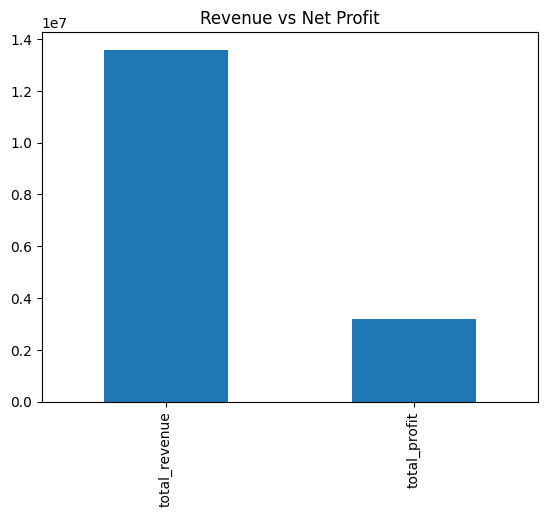

In [17]:
summary.T.plot(kind="bar", legend=False, title="Revenue vs Net Profit")


## Revenue v/s Profit 
##### When we compare total revenue and total profit, we can clearly see the diffrence the profit is so low in comparison to  revenue.
##### This shows that higher revenue does not assure higher profits. A business can appear to grow based on revenue  while still losing money due to hidden costs.
#### so what, 
##### If the company focus only on revenue it may increase sales but reduce overall profitablity.


In [14]:
customers = pd.read_sql(
    "SELECT * FROM ecommerce.customer_profit;",
    engine
)
customers


,customer_id,customer_revenue,customer_cost,customer_freight_value,customer_net_profit,customer_total_order
0,00012a2ce6f8dcda20d059ce98491703,89.80,53.880,24.94,10.980,1
1,000161a058600d5901f007fab4c27140,54.90,32.940,12.51,9.450,1
2,0001fd6190edaaf884bcaf3d49edf079,179.99,107.994,15.43,56.566,1
3,0002414f95344307404f0ace7a26f1d5,149.90,89.940,29.45,30.510,1
4,000379cdec625522490c315e70c7a9fb,93.00,55.800,14.01,23.190,1
...,...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,78.00,46.800,13.91,17.290,1
98662,fffecc9f79fd8c764f843e9951b11341,54.90,32.940,26.46,-4.500,1
98663,fffeda5b6d849fbd39689bb92087f431,47.90,28.740,15.23,3.930,1
98664,ffff42319e9b2d713724ae527742af25,199.90,119.940,14.23,65.730,1


In [27]:
customer_sorted_by_revenue = customers.sort_values(
    by="customer_revenue",
    ascending=False
)


In [43]:
top_revenue_customers = customer_sorted_by_revenue.head(15)

top_revenue_customers=top_revenue_customers[
    ["customer_id", "customer_revenue", "customer_net_profit"]
]
top_revenue_customers

,customer_id,customer_revenue,customer_net_profit
8475,1617b1357756262bfa56ab541c47bc16,13440.00,5151.920
91284,ec5b2ba62e574342386871631fafd3fc,7160.00,2749.120
76948,c6e2731c5b391845f6800c97401a43a9,6735.00,2499.690
94398,f48d464a0baaea338cb25f816991ab1f,6729.00,2498.390
24603,3fd6777bbce08a352fddd04e4a7cc8f6,6499.00,2371.940
2049,05455dfa7cd02f13d132aa7a6a9729c6,5934.60,2226.900
86248,df55c14d1476a9a3467f131269c2477f,4799.00,1768.260
14182,24bbf5fd2f2e1b359ee7de94defc4a15,4690.00,1801.660
86733,e0a2412720e9ea4f26c1ac985f6a7358,4599.90,1630.420
23771,3d979689f636322c62418b6346b1c6d2,4590.00,1744.220


In [45]:
top_losses_customer=customers.sort_values(
    by="customer_net_profit",
).head(15)[
    ["customer_id", "customer_revenue", "customer_net_profit"]
]
top_losses_customer

,customer_id,customer_revenue,customer_net_profit
91621,ed583a2a1eaf0dedc33af816153e8b8c,1050.00,-1374.960
36193,5e312b0d9bf5c91599eb42120e633b19,419.40,-834.530
39684,674b0ce80de37d32613f9337bc3a8f80,347.97,-235.092
28270,496b6a69dc3a20cc0ea64bea9e1328c9,479.94,-209.604
27556,478d1ae10b5cfa37f148adccee44970a,365.70,-187.860
38614,647f99eb0007e6db23fa6ad97b03b1db,74.90,-185.470
37894,628dc39381786ac5f638abd41f96f35e,369.00,-177.440
62252,a16a13abd16a9d85e4b382ecdc192d33,139.98,-176.698
98447,ff73a759cba534dba02faaffdeb00e61,189.90,-168.380
883,023cf83ac35d703a6f3c1b31bcf844d5,840.00,-166.980


## top_revenue_customers vs top_losses_customer
##### on comaprison top_revenue_customers and top_losses_customer ,its shows revenue alone highlight only top customer profits but its fails for surface level customer who quietly generate losses .
#### so we can say , good revenue alone can not assure prfoit, customer with good revenue is also non-profitabe for company.
#### we have to stop Incentives rewarding system to the wrong customer .

In [46]:
orders = pd.read_sql(
    "SELECT * FROM ecommerce.order_profit;",
    engine
)
orders

,order_id,order_revenue,estimated_cost,freight_value,order_net_profit
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,35.340,13.29,10.270
1,00018f77f2f0320c557190d7a144bdd3,239.90,143.940,19.93,76.030
2,000229ec398224ef6ca0657da4fc703e,199.00,119.400,17.87,61.730
3,00024acbcdf0a6daa1e931b038114c75,12.99,7.794,12.79,-7.594
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,119.940,18.14,61.820
...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,179.994,43.41,76.586
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,210.000,36.53,103.470
98663,fffce4705a9662cd70adb13d4a31832d,99.90,59.940,16.95,23.010
98664,fffe18544ffabc95dfada21779c9644f,55.99,33.594,8.72,13.676


In [48]:
orders["freight_ratio"] = orders["freight_value"] / orders["order_revenue"]
orders

,order_id,order_revenue,estimated_cost,freight_value,order_net_profit,freight_ratio
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,35.340,13.29,10.270,0.225637
1,00018f77f2f0320c557190d7a144bdd3,239.90,143.940,19.93,76.030,0.083076
2,000229ec398224ef6ca0657da4fc703e,199.00,119.400,17.87,61.730,0.089799
3,00024acbcdf0a6daa1e931b038114c75,12.99,7.794,12.79,-7.594,0.984604
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,119.940,18.14,61.820,0.090745
...,...,...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,179.994,43.41,76.586,0.144705
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,210.000,36.53,103.470,0.104371
98663,fffce4705a9662cd70adb13d4a31832d,99.90,59.940,16.95,23.010,0.169670
98664,fffe18544ffabc95dfada21779c9644f,55.99,33.594,8.72,13.676,0.155742


In [52]:
high_freight_orders = orders[
    orders["freight_ratio"] > 0.20
].head(15)
high_freight_orders

,order_id,order_revenue,estimated_cost,freight_value,order_net_profit,freight_ratio
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,35.340,13.29,10.270,0.225637
3,00024acbcdf0a6daa1e931b038114c75,12.99,7.794,12.79,-7.594,0.984604
5,00048cc3ae777c65dbb7d2a0634bc1ea,21.90,13.140,12.69,-3.930,0.579452
6,00054e8431b9d7675808bcb819fb4a32,19.90,11.940,11.85,-3.890,0.595477
9,0005f50442cb953dcd1d21e1fb923495,53.99,32.394,11.40,10.196,0.211150
11,00063b381e2406b52ad429470734ebd5,45.00,27.000,12.98,5.020,0.288444
12,0006ec9db01a64e59a68b2c340bf65a7,74.00,44.400,23.32,6.280,0.315135
13,0008288aa423d2a3f00fcb17cd7d8719,99.80,59.880,26.74,13.180,0.267936
14,0009792311464db532ff765bf7b182ae,99.90,59.940,27.65,12.310,0.276777
18,000e562887b1f2006d75e0be9558292e,25.00,15.000,16.11,-6.110,0.644400


In [53]:
high_freight_orders["order_net_profit"].describe()


count    15.000000
mean      4.145600
std       7.832071
min      -7.594000
25%      -3.472000
50%       4.500000
75%      10.233000
max      18.450000
Name: order_net_profit, dtype: float64

In [55]:
low_freight_orders = orders[
    orders["freight_ratio"] <= 0.10
]
low_freight_orders


,order_id,order_revenue,estimated_cost,freight_value,order_net_profit,freight_ratio
1,00018f77f2f0320c557190d7a144bdd3,239.90,143.940,19.93,76.030,0.083076
2,000229ec398224ef6ca0657da4fc703e,199.00,119.400,17.87,61.730,0.089799
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,119.940,18.14,61.820,0.090745
7,000576fe39319847cbb9d288c5617fa6,810.00,486.000,70.75,253.250,0.087346
8,0005a1a1728c9d785b8e2b08b904576c,145.95,87.570,11.65,46.730,0.079822
...,...,...,...,...,...,...
98631,ffea20c7630343a6cd9e09858c1295cd,149.90,89.940,13.34,46.620,0.088993
98641,ffef98cd5ecdc992fefbd967549520dd,139.90,83.940,13.11,42.850,0.093710
98643,ffefb169ddf34cecc0622a6d3cc387f8,129.99,77.994,12.11,39.886,0.093161
98651,fff6b8ca971f8e3ec822e99d0f2d3d21,199.00,119.400,16.83,62.770,0.084573


In [56]:
low_freight_orders["order_net_profit"].describe()


count    15705.000000
mean       127.923753
std        151.254832
min         21.560000
25%         54.316000
50%         79.920000
75%        135.960000
max       5151.920000
Name: order_net_profit, dtype: float64

#### The analysis shows that profit loss is not random and is not caused by customer activity alone. A major driver of reduced profitability is high freight cost, especially for orders with relatively low revenue. In such cases, shipping expenses consume a large portion of the order value, leaving very little or no profit.